## Final Project Submission

Please fill out:
* Student name: Phillip Ojo
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Data became very unusable for my likeing. Now i will try the route of using API and webscrapping from TMDB website to attempt to retrive relevant data to use in my visulaization.

In [2]:
#Webscrapping TMDB website
!pip install fake_useragent
!pip install lxml
import fake_useragent
import lxml
from bs4 import BeautifulSoup
import requests

tmdb_webpage = 'https://www.themoviedb.org/movie/top-rated?page=0' 


In [3]:
#Check connection
response = requests.get(url= tmdb_webpage, timeout=3)
print('Status Code:', response.status_code)
if response.status_code == 200:
    print('Connection successfull.\n\n')
else:
    print('Error. Check Status code table.\n\n')

page_content = response.content
soup = BeautifulSoup(page_content, 'html.parser') 

Status Code: 200
Connection successfull.




In [4]:
#Function to load all the pages and scrap the data

def next_page(base_url):
    new_page_num = int(base_url.split('=')[-1]) +1
    base_url = base_url.split('=')[0] + '=' + str(new_page_num)
    return (base_url)

next_page(tmdb_webpage)

'https://www.themoviedb.org/movie/top-rated?page=1'

In [5]:
#Get Movie Specific Data
def scrape_movies_list(tmdb_webpage):
    
    base_movie_url = 'https://www.themoviedb.org/'
    movies_data = soup.find('section', id='media_results')
    movie_entries = movies_data.findAll('a', class_='image')
    movie_titles = []
    movie_pages = []
  
    
    for entry in movie_entries:    
        title = entry.get('title')
        ext_1 = entry.get('href').split('/movie/')
        ext_2 = title.replace(' ','-').replace('/','-')
        url = base_movie_url+'movie/'+ext_1[1]+'-'+ext_2
        movie_titles.append(title)
        movie_pages.append(url)

    return movie_titles

scrape_movies_list(tmdb_webpage)

[]

In [6]:
#Getting Movie Titles

specific_movie_data_1 = soup.find('div', class_= 'single_column')

def get_movie_titles(soup):
        try:
            title = specific_movie_data_1.find('h2').text.split('(')[0].strip()

        except:
            title = None 

        return title

get_movie_titles(soup)

In [7]:
#Getting the Movie Classification


def get_movie_classification(soup):
        try:
            classification = specific_movie_data_1.find('span', class_ = 'certification').text.strip()
    
        except:
            classification = None

        return classification



In [55]:
#Getting Genre List

def get_movie_genre(soup):
    try:
        
        for genre in specific_movie_data_1.find('span', class_ = 'genres').findAll('a'):
            genre_list.append(genre.text)

    except:
        genre_list = None

    return genre_list    



In [45]:
#Getting Release Date


def get_release_date(soup): 
    try:
        release_date = specific_movie_date_1.find('span', class_ = 'release').text.strip().split('(')[0]
    
    except:
        release_data = None
    
    return release_data

In [46]:
#Getting Average Movie Rating

def get_average_rating(soup):

    try:
        user_score = specific_movie_data_1.find('div', class_ = 'percent').find('span').get('class')[1].split('-r')[-1]
    
    except:
        user_score = None

In [ ]:

classification = []
genre_list = []
release_data = []
Average_movie_rating = [] 


for i in range(1,292):
    if i == 1:
        url = tmdb_webpage
    else:
            url = next_page(tmdb_webpage)

    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    
    
    titles += retrieve_titles(soup)
    star_ratings += retrieve_ratings(soup)
    prices += retrieve_prices(soup)
    avails += retrieve_availabilities(soup)
df = pd.DataFrame([titles, star_ratings, prices, avails]).transpose()
df.columns = ['Title', 'Star_Rating', 'Price_(pounds)', 'Availability']
print(len(df))
df.head()

Manipulating the dataset

In [8]:
tmdb_df = pd.read_csv('tmdb_webscraping.csv')
tmdb_df.head()

,Unnamed: 0,title,release_date,genre,run_time,certification,user_score,original_language,movie_budget,movie_revenue,keywords,actors,director_list
0,0,Dilwale Dulhania Le Jayenge,10/20/1995,"['Comedy', 'Drama', 'Romance']",3h 10m,U,88,Hindi,13200000.0,100000000.0,[],"['Shah Rukh Khan', 'Kajol', 'Amrish Puri', 'An...",['Aditya Chopra']
1,0,The Shawshank Redemption,10/14/1994,"['Drama', 'Crime']",2h 22m,R,87,English,25000000.0,28341469.0,"['prison', 'corruption', 'police brutality', '...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",['Frank Darabont']
2,0,The Godfather,03/15/1972,"['Drama', 'Crime']",2h 55m,R,87,English,6000000.0,245066411.0,"['italy', 'loss of loved one', 'love at first ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",['Francis Ford Coppola']
3,0,Schindler's List,02/04/1994,"['Drama', 'History', 'War']",3h 15m,R,86,English,22000000.0,321365567.0,"['based on novel or book', 'factory', 'concent...","['Liam Neeson', 'Ben Kingsley', 'Ralph Fiennes...",['Steven Spielberg']
4,0,Your Name.,08/26/2016,"['Romance', 'Animation', 'Drama']",1h 46m,PG,86,Japanese,NaN,357986087.0,"['time travel', 'supernatural', 'afterlife', '...","['Ryunosuke Kamiki', 'Mone Kamishiraishi', 'Ma...",['Makoto Shinkai']


In [78]:
#Filter Rows by movie bu rated R
tmdb_df1 = tmdb_df[(tmdb_df.certification == "R") & (tmdb_df.user_score >= 70 ) ]


In [97]:
tmdb_df['certification'].unique()

array(['U', 'R', 'PG', 'PG-13', '14', 'NR', '12', 'G', nan, '16', '15',
       'MA15+', '6', '12A', '12+', 'T', '18+', 'L', 'VM14', 'Livre', '0+',
       '15세 이상 관람가', '0', 'AL', 'M/12', '12세 이상 관람가', 'NC-17', '18',
       '전체관람가', 'e Livre', '청소년 관람불가', 'e 10', '11', '16+', '13', 'R15+',
       'M', '14A', 'M/14', 'APTA', '7', 'B', 'VM18', 'UA', 'R-15', 'Btl',
       'M18', 'A', 'TP', 'PG-12', '10', 'R18+', '14 Anos', 'KN', 'PG13',
       '13+', 'R21', 'NC16'], dtype=object)

In [100]:
Null_rankings= ['14','12','G','nan','16','15','MA15+','6','12A','12+','T','18+','L','VM14','Livre','0+','15세 이상 관람가','0','AL','M/12','12세 이상 관람가','NC-17','18','전체관람가', 'e Livre', '청소년 관람불가','e 10','11','16+','13','R15+','M','14A','M/14','APTA','7','B','VM18','UA','R-15','Btl','M18','A','TP','PG-12','10','R18+','14 Anos', 'KN','PG13','13+','R21','NC16']

tmdb_df['certification'].replace( Null_rankings, 'MISC' , inplace = True)
tmdb_df['certification'].unique()

array(['U', 'R', 'PG', 'PG-13', 'MISC', 'NR', nan], dtype=object)

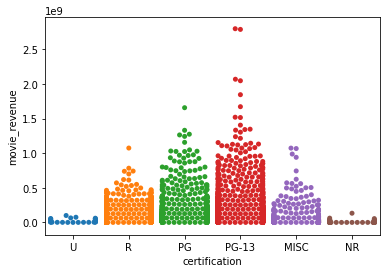

In [101]:
sns.swarmplot(data = tmdb_df, x= 'certification', y ='movie_revenue')

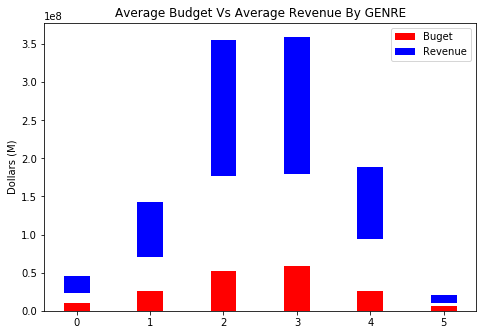

In [129]:
#Average Revenue Data

U_rev_df = tmdb_df[tmdb_df['certification'] == 'U']
U_rev_mean = round(U_rev_df['movie_revenue'].mean(),0)
R_rev_df = tmdb_df[tmdb_df['certification'] == 'R']
R_rev_mean = round(R_rev_df['movie_revenue'].mean(),0)
PG_rev_df = tmdb_df[tmdb_df['certification'] == 'PG']
PG_rev_mean = round(PG_rev_df['movie_revenue'].mean(),0)
PG13_rev_df = tmdb_df[tmdb_df['certification'] == 'PG-13']
PG13_rev_mean = round(PG13_rev_df['movie_revenue'].mean(),0)
MISC_rev_df = tmdb_df[tmdb_df['certification'] == 'MISC']
MISC_rev_mean = round(MISC_rev_df['movie_revenue'].mean(),0)
NR_rev_df = tmdb_df[tmdb_df['certification'] == 'NR']
NR_rev_mean = round(NR_rev_df['movie_revenue'].mean(),0)


#Average budget Data
U_budg_df = tmdb_df[tmdb_df['certification'] == 'U']
U_budg_mean = round(U_budg_df['movie_budget'].mean(),0)
R_budg_df = tmdb_df[tmdb_df['certification'] == 'R']
R_budg_mean = round(R_budg_df['movie_budget'].mean(),0)
PG_budg_df = tmdb_df[tmdb_df['certification'] == 'PG']
PG_budg_mean = round(PG_budg_df['movie_budget'].mean(),0)
PG13_budg_df = tmdb_df[tmdb_df['certification'] == 'PG-13']
PG13_budg_mean = round(PG13_budg_df['movie_budget'].mean(),0)
MISC_budg_df = tmdb_df[tmdb_df['certification'] == 'MISC']
MISC_budg_mean = round(MISC_budg_df['movie_budget'].mean(),0)
NR_budg_df = tmdb_df[tmdb_df['certification'] == 'NR']
NR_budg_mean = round(NR_budg_df['movie_budget'].mean(),0)

Buget = [U_budg_mean, R_budg_mean, PG_budg_mean, PG13_budg_mean, MISC_budg_mean, NR_budg_mean]
Revenue = [U_rev_mean, R_rev_mean, PG_rev_mean, PG13_rev_mean, MISC_rev_mean, NR_rev_mean]

Ratings = ["U", "R", "PG", "PG13", "MISC","NR"]

N = 6
ind = np.arange(N)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, Buget, width, color='r')
ax.bar(ind, Revenue, width,bottom=Revenue, color='b')
ax.set_ylabel('Dollars (M)')
ax.set_title('Average Budget Vs Average Revenue By GENRE')
ax.set_xticks(ind, ('U', 'R', 'PG', 'PG-13', 'G5'))
#ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Buget', 'Revenue'])
plt.show()